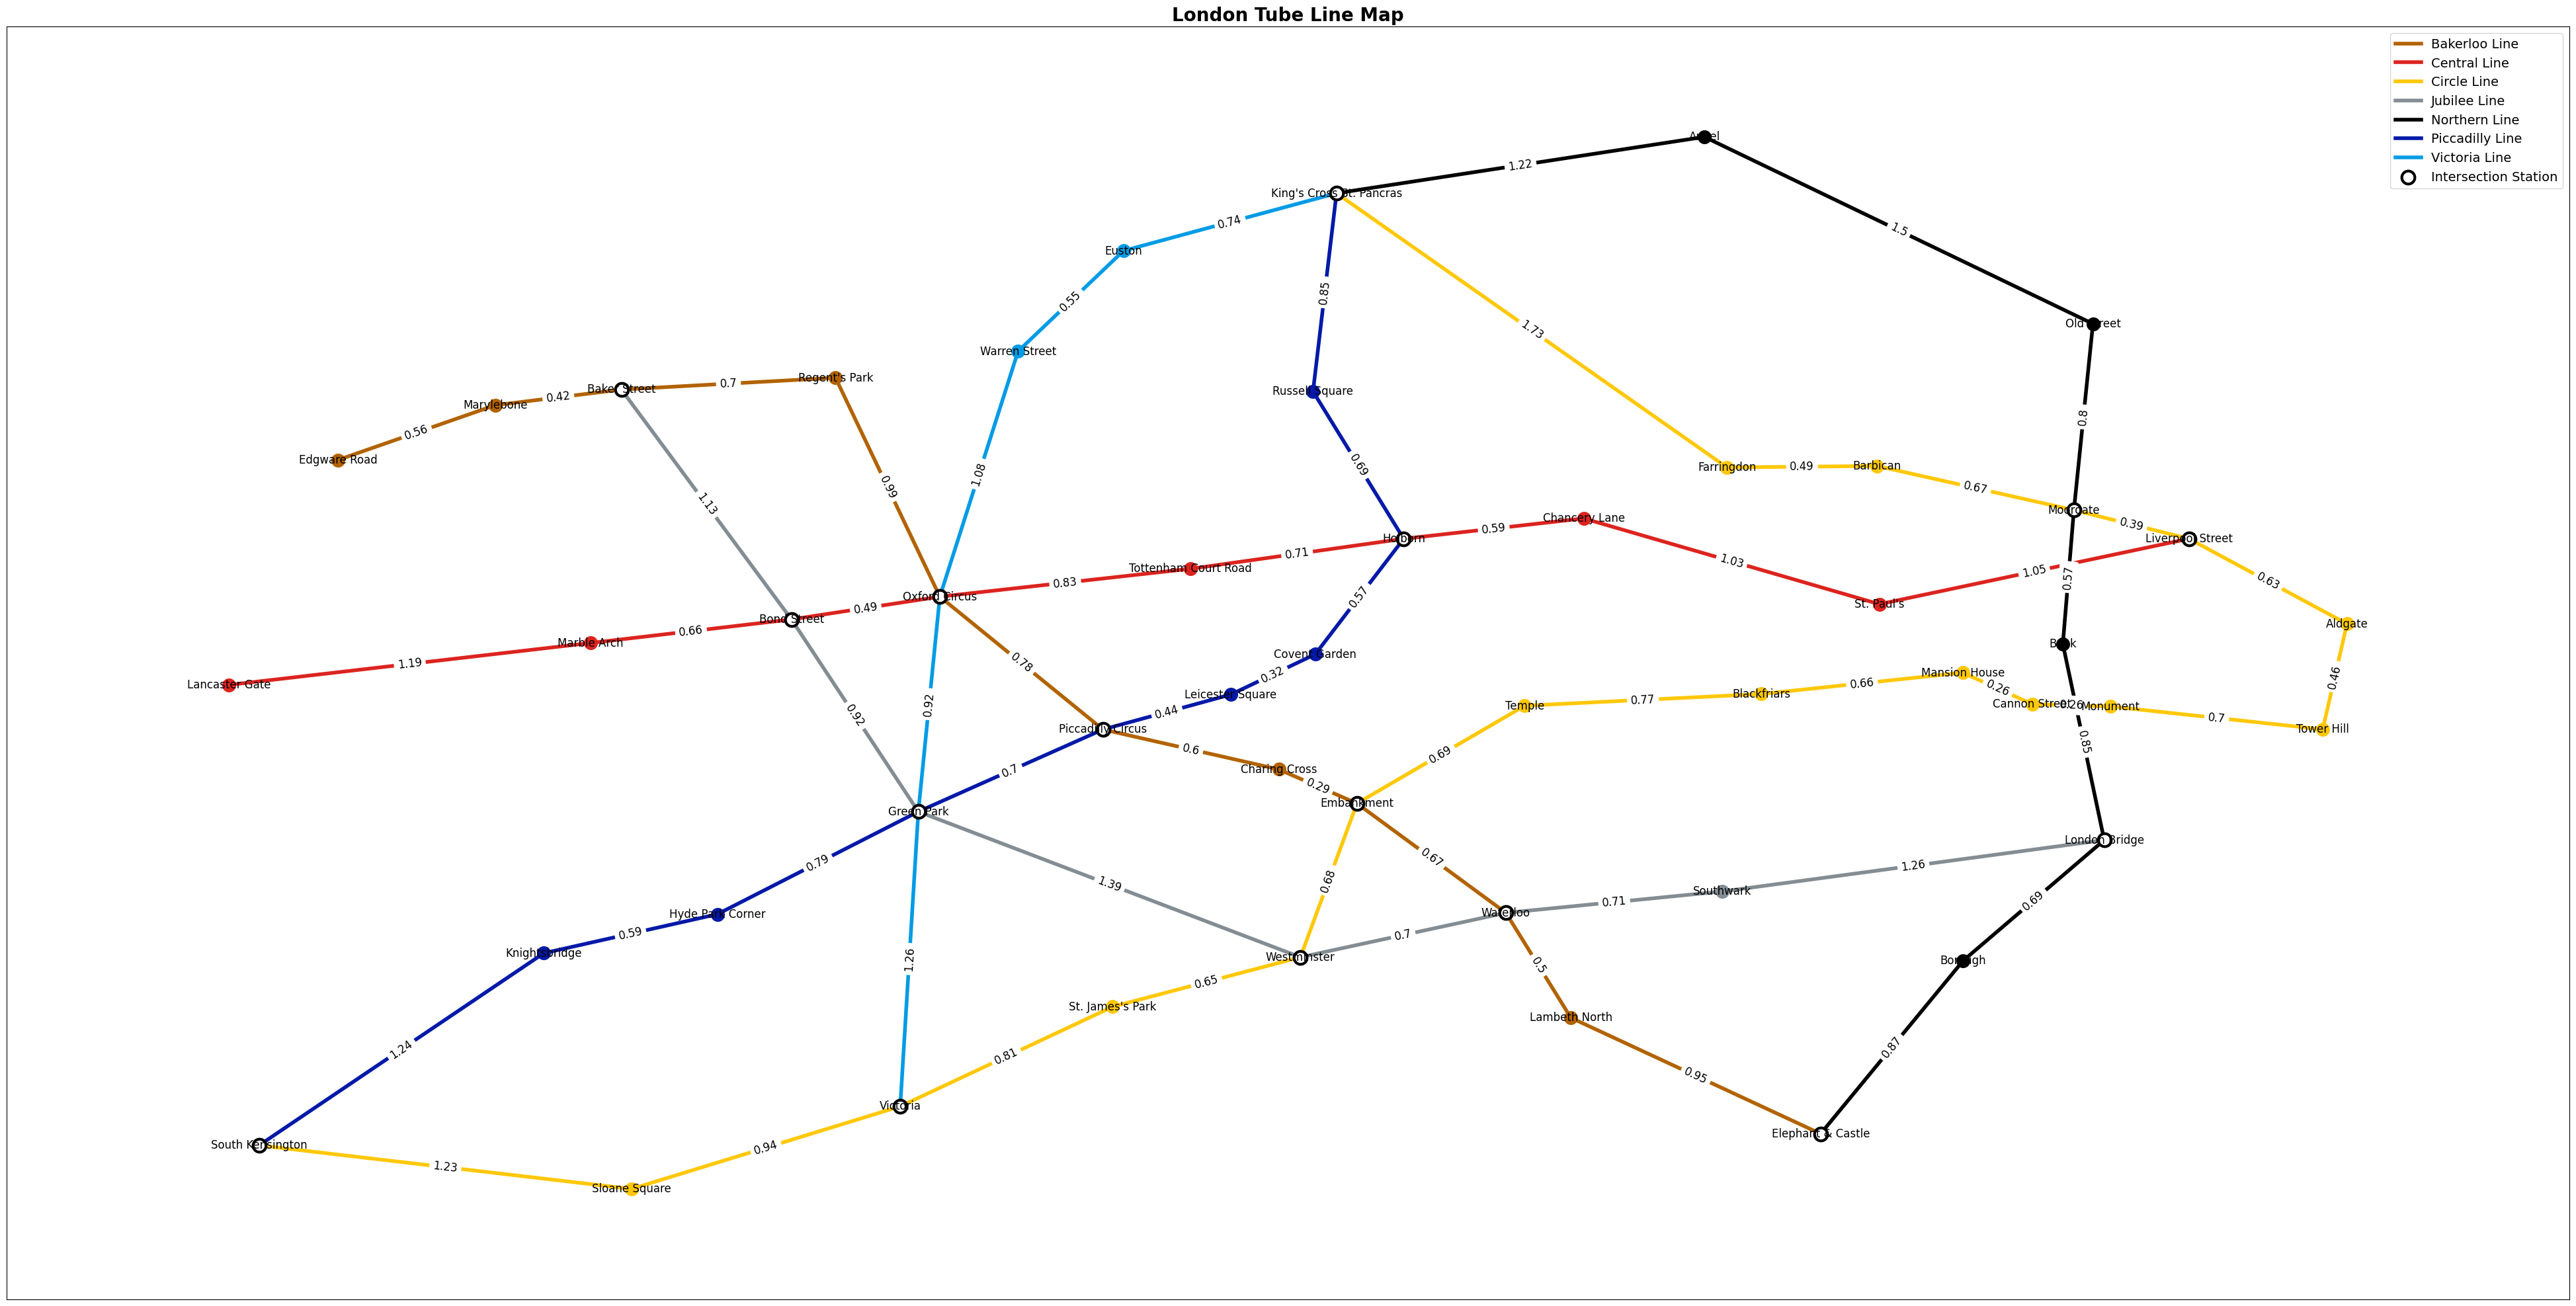

In [19]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ------------------- Data Loading -------------------
# Load the CSV file
file_path = 'London stations.csv'  # Replace with the actual file path
stations_data = pd.read_csv(file_path)
stations_data.columns = stations_data.columns.str.strip()  # Remove extra spaces

# ------------------- Haversine Function -------------------
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# ------------------- Graph Data Preparation -------------------
bakerloo_line_edges = [
    ("Elephant & Castle", "Lambeth North"),
    ("Lambeth North", "Waterloo"),
    ("Waterloo", "Embankment"),
    ("Embankment", "Charing Cross"),
    ("Charing Cross", "Piccadilly Circus"),
    ("Piccadilly Circus", "Oxford Circus"),
    ("Oxford Circus", "Regent's Park"),
    ("Regent's Park", "Baker Street"),
    ("Baker Street", "Marylebone"),
    ("Marylebone", "Edgware Road"),
]

central_line_edges = [
    ("Lancaster Gate", "Marble Arch"),
    ("Marble Arch", "Bond Street"),
    ("Bond Street", "Oxford Circus"),
    ("Oxford Circus", "Tottenham Court Road"),
    ("Tottenham Court Road", "Holborn"),
    ("Holborn", "Chancery Lane"),
    ("Chancery Lane", "St. Paul's"),
    ("St. Paul's", "Liverpool Street"),
]

circle_line_edges = [
    ("King's Cross St. Pancras", "Farringdon"),
    ("Farringdon", "Barbican"),
    ("Barbican", "Moorgate"),
    ("Moorgate", "Liverpool Street"),
    ("Liverpool Street", "Aldgate"),
    ("Aldgate", "Tower Hill"),
    ("Tower Hill", "Monument"),
    ("Monument", "Cannon Street"),
    ("Cannon Street", "Mansion House"),
    ("Mansion House", "Blackfriars"),
    ("Blackfriars", "Temple"),
    ("Temple", "Embankment"),
    ("Embankment", "Westminster"),
    ("Westminster", "St. James's Park"),
    ("St. James's Park", "Victoria"),
    ("Victoria", "Sloane Square"),
    ("Sloane Square", "South Kensington"),
]

jubilee_line_edges = [
    ("Baker Street", "Bond Street"),
    ("Bond Street", "Green Park"),
    ("Green Park", "Westminster"),
    ("Westminster", "Waterloo"),
    ("Waterloo", "Southwark"),
    ("Southwark", "London Bridge"),
]

piccadilly_line_edges = [
    ("South Kensington", "Knightsbridge"),
    ("Knightsbridge", "Hyde Park Corner"),
    ("Hyde Park Corner", "Green Park"),
    ("Green Park", "Piccadilly Circus"),
    ("Piccadilly Circus", "Leicester Square"),
    ("Leicester Square", "Covent Garden"),
    ("Covent Garden", "Holborn"),
    ("Holborn", "Russell Square"),
    ("Russell Square", "King's Cross St. Pancras"),
]

victoria_line_edges = [
    ("Victoria", "Green Park"),
    ("Green Park", "Oxford Circus"),
    ("Oxford Circus", "Warren Street"),
    ("Warren Street", "Euston"),
    ("Euston", "King's Cross St. Pancras"),
]

northern_line_edges = [
    ("Elephant & Castle", "Borough"),
    ("Borough", "London Bridge"),
    ("London Bridge", "Bank"),
    ("Bank", "Moorgate"),
    ("Moorgate", "Old Street"),
    ("Old Street", "Angel"),
    ("Angel", "King's Cross St. Pancras"),
]

edges = []
edge_labels = {}
color_mapping = {
    'bakerloo': '#B26300',
    'central': '#DC241F',
    'circle': '#FFC80A',
    'jubilee': '#838D93',
    'piccadilly': '#0019A8',
    'victoria': '#039BE5',
    'northern': '#000000',
}

for edge_list, line_color in [
    (bakerloo_line_edges, color_mapping['bakerloo']),
    (central_line_edges, color_mapping['central']),
    (circle_line_edges, color_mapping['circle']),
    (jubilee_line_edges, color_mapping['jubilee']),
    (piccadilly_line_edges, color_mapping['piccadilly']),
    (victoria_line_edges, color_mapping['victoria']),
    (northern_line_edges, color_mapping['northern'])
]:
    for edge in edge_list:
        station1 = stations_data[stations_data['Station'] == edge[0]].iloc[0]
        station2 = stations_data[stations_data['Station'] == edge[1]].iloc[0]
        distance = haversine(station1['Latitude'], station1['Longitude'],
                             station2['Latitude'], station2['Longitude'])
        edges.append((edge[0], edge[1], round(distance, 2), line_color))
        edge_labels[(edge[0], edge[1])] = f"{round(distance, 2)}"

G = nx.Graph()
for _, row in stations_data.iterrows():
    G.add_node(row['Station'], pos=(row['Longitude'], row['Latitude']))

for edge in edges:
    G.add_edge(edge[0], edge[1], color=edge[3], weight=edge[2])

stations_by_line = {
    'bakerloo': set(station for edge in bakerloo_line_edges for station in edge),
    'central': set(station for edge in central_line_edges for station in edge),
    'circle': set(station for edge in circle_line_edges for station in edge),
    'jubilee': set(station for edge in jubilee_line_edges for station in edge),
    'piccadilly': set(station for edge in piccadilly_line_edges for station in edge),
    'victoria': set(station for edge in victoria_line_edges for station in edge),
    'northern': set(station for edge in northern_line_edges for station in edge),
}

intersection_stations = set()
for station in G.nodes():
    line_count = sum(station in stations_by_line[line] for line in stations_by_line)
    if line_count >= 2:
        intersection_stations.add(station)

# ------------------- Node Coloring -------------------
node_colors = {}
for node in G.nodes():
    if node in intersection_stations:
        node_colors[node] = 'white'  # Intersection stations
    elif node in stations_by_line['bakerloo']:
        node_colors[node] = color_mapping['bakerloo']
    elif node in stations_by_line['central']:
        node_colors[node] = color_mapping['central']
    elif node in stations_by_line['circle']:
        node_colors[node] = color_mapping['circle']
    elif node in stations_by_line['jubilee']:
        node_colors[node] = color_mapping['jubilee']
    elif node in stations_by_line['piccadilly']:
        node_colors[node] = color_mapping['piccadilly']
    elif node in stations_by_line['victoria']:
        node_colors[node] = color_mapping['victoria']
    elif node in stations_by_line['northern']:
        node_colors[node] = color_mapping['northern']

G_filtered = G.subgraph(node_colors.keys())

# ------------------- Graph Visualization -------------------
plt.figure(figsize=(50, 25))
positions = nx.get_node_attributes(G_filtered, 'pos')

# Draw non-intersection nodes
for node in G_filtered.nodes():
    if node not in intersection_stations:
        nx.draw_networkx_nodes(
            G_filtered,
            pos=positions,
            nodelist=[node],
            node_size=200,
            node_color=node_colors[node]
        )

# Draw intersection nodes
for node in intersection_stations:
    x, y = positions[node]
    plt.scatter(x, y, s=200, color='white', edgecolor='black', linewidth=3, zorder=3)

# Draw edges with colors
edge_colors = [G_filtered[u][v]['color'] for u, v in G_filtered.edges()]
nx.draw_networkx_edges(
    G_filtered,
    pos=positions,
    edge_color=edge_colors,
    width=4
)

# Draw labels with adjusted positions
nx.draw_networkx_labels(
    G_filtered,
    pos=positions,
    font_size=12,
    font_weight='normal'
)

# Draw labels for edges (distances in km)
nx.draw_networkx_edge_labels(
    G_filtered,
    pos=positions,
    edge_labels=edge_labels,
    font_size=12,
    font_weight='normal'
)

# Add legend
plt.plot([], [], color=color_mapping['bakerloo'], linewidth=4, label='Bakerloo Line')
plt.plot([], [], color=color_mapping['central'], linewidth=4, label='Central Line')
plt.plot([], [], color=color_mapping['circle'], linewidth=4, label='Circle Line')
plt.plot([], [], color=color_mapping['jubilee'], linewidth=4, label='Jubilee Line')
plt.plot([], [], color=color_mapping['northern'], linewidth=4, label='Northern Line')
plt.plot([], [], color=color_mapping['piccadilly'], linewidth=4, label='Piccadilly Line')
plt.plot([], [], color=color_mapping['victoria'], linewidth=4, label='Victoria Line')
plt.scatter([], [], color='white', edgecolor='black', s=200, linewidth=3, label='Intersection Station')  # Updated edge width
plt.legend(loc='upper right', fontsize=14)

plt.title("London Tube Line Map", fontsize=20, fontweight='bold')
plt.show()
